<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE3/blob/main/Homework%20-%20%CE%A3%CF%85%CE%BD%CF%84%CE%B1%CE%B3%CE%AD%CF%82%20%CE%9C%CE%B1%CE%B3%CE%B5%CE%B9%CF%81%CE%B9%CE%BA%CE%AE%CF%82/MachineLearningDecisionTreesNaive_BayesClassifiersFeatureImportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Μηχανική Μάθηση με 
 # 1. Decision Trees
 

> Πάμε να δούμε με ποιον τρόπο η μηχανική μάθηση μπορεί να μας βοηθήσει στην πρόβλεψη κάποιων γεγονότων, καταστάσεων, κλπ. 


## Ας ξεκινήσουμε το πείραμα!

Εμένα μου αρέσει πάρα πολύ να μαγειρεύω, 

αλλά δεν μ αρέσει να διαβάζω συνταγές μόνο και μόνο για να δω από ποια κουζίνα προέρχονται.

Θα ήθελα η μηχανή  να μπορούσε  να μου διαβάζει συνταγές μαγειρικής που βρίσκει στο internet και να μου προτείνει μόνο αυτές που μιλούν για ιταλικό φαγητό! 




## Προετοιμασία των δεδομένων

### Βήμα 1.1: Εισάγουμε τα δεδομένα

αλλά πριν, ζητάμε να μας εμφανίζει έως και 1000 χαρακτήρες που υπάρχουν στις στήλες ενός dataframe

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
%matplotlib inline 



Να συνδεθούμε πρώτα με το Google Drive αφού πρώτα έχουμε ανεβάσει εκεί το recipes.csv αρχείο με τις συνταγές μας

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')



# PATH = "/gdrive/My\ Drive/Colab\ Notebooks/"
#!ls {PATH}

In [ ]:
#df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/recipes.csv")
df = pd.read_csv('https://raw.githubusercontent.com/datajour-gr/ML-algorithms/master/week%205/recipes.csv')
df.head()

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles"
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil"
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers"
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf"


### Βήμα 1.2: Δημιουργούμε μια καινούργια στήλη

Οι τιμές της στήλης  πρέπει να είναι ένας αριθμός για να μπορεί η μηχανή να το διαχειριστεί σωστά. Ας θεωρήσουμε ότι φτιάχνουμε μια στήλη "italian".

Οπότε ας πούμε ότι το "italian" θα είναι = `1` και όλες οι άλλες κουζίνες θα είναι = `0`.

In [ ]:
df['is_italian'] = (df['cuisine'] == 'italian').astype(int)
df.head(20)

,cuisine,id,ingredient_list,is_italian
0,greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles",0
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil",0
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers",0
3,indian,22213,"water, vegetable oil, wheat, salt",0
4,indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf",0
5,jamaican,6602,"plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder",0
6,spanish,42779,"olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage",0
7,italian,3735,"sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries",1
8,mexican,16903,"olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh",0
9,italian,12734,"chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley",1


In [ ]:
df[df.is_italian == 1].head(4)

,cuisine,id,ingredient_list,is_italian
7,italian,3735,"sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries",1
9,italian,12734,"chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley",1
10,italian,5875,"pimentos, sweet pepper, dried oregano, olive oil, garlic, sharp cheddar cheese, pepper, swiss cheese, provolone cheese, canola oil, mushrooms, black olives, sausages",1
12,italian,2698,"Italian parsley leaves, walnuts, hot red pepper flakes, extra-virgin olive oil, fresh lemon juice, trout fillet, garlic cloves, chipotle chile, fine sea salt, flat leaf parsley",1


### Βήμα 1.3: Φτιάχνουμε το  dataframe με τα features μας

Πρόκειται να προβλέψουμε την κουζίνα **μόνο από 3 υλικά **.

Ποια είναι τα 3 υλικά που είναι εντελώς ιταλικά? 

In [ ]:
#df.ingredient_list.str.contains("......").astype(int)

In [ ]:
features_df = pd.DataFrame({
    'has_tomatoes': df.ingredient_list.str.contains('tomato').astype(int),
    'has_olive_oil': df.ingredient_list.str.contains('olive oil').astype(int),
    'has_soy_sauce': df.ingredient_list.str.contains('soy sauce').astype(int)
})
features_df.head(3)

,has_tomatoes,has_olive_oil,has_soy_sauce
0,1,0,0
1,1,0,0
2,0,0,1


In [ ]:
features_df.head(3)

,has_tomatoes,has_olive_oil,has_soy_sauce
0,1,0,0
1,1,0,0
2,0,0,1


In [ ]:
features_df.shape

(39774, 3)

## Βήμα 2: Χρήση του classifier
## Βήμα 2.1: Κάνουμε import το classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
estimator = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

### Βήμα 2.2: Χωρίζουμε τα data σε test και train data

In [ ]:
# Το train_test_split θα χωρίσει αυτόματα τα δεδομένα μας σε 2 μέρη 
from sklearn.model_selection import train_test_split

# Χωρίζουμε σε...
# X = όλα τα features
# y = όλα τα labels
# X_train είναι τα features για να εκπαιδεύσουμε τον αλγόριθμο στο (80%)
# y_train είναι τα labels στα οποία θα εκπαιδευτεί το(80%)
# X_test είναι τα features στα οποία θα τεστάρουμε το υπόλοιπο (20%)
# y_train είναι τα labels που θα γίνει το τεστ (20%)

X_train, X_test, y_train, y_test = train_test_split(
    features_df.values, # αυτό είναι το αν έχει μέσα τομάτες, λάδι κ.λπ 
    df.is_italian, #αυτό είναι το LABEL που φτιάξαμε και είναι αριθμός! (δηλαδή 0/1, όχι Ναι/Όχι)
    test_size=0.2) 

# Η πρώτη παράμετρος είναι τα FEATURES. 
# η δεύτερη είναι το LABEL ως αριθμός 
# 80% training, 20% testing

In [ ]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
val_pred = estimator.predict(X_test)

In [ ]:
#New_pred = estimator.predict(New_test)

Για να δουμε την ακρίβεια της πρόβλεψης...

In [ ]:
f1_score(y_test, val_pred, average='macro')

0.44583768721699757

Με τόσο χαμηλό σκορ φαίνεται δεν τα πήγαμε καλά στην πρόβλεψη

Για να δούμε ποια από τα 3 υλικά της συνταγής βοήθησαν περισσότερο στην πρόβλεψη του ιταλικού φαγητού? 

In [ ]:
fi = pd.DataFrame(estimator.feature_importances_, features_df.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
has_olive_oil,0.851906
has_soy_sauce,0.148094
has_tomatoes,0.000000


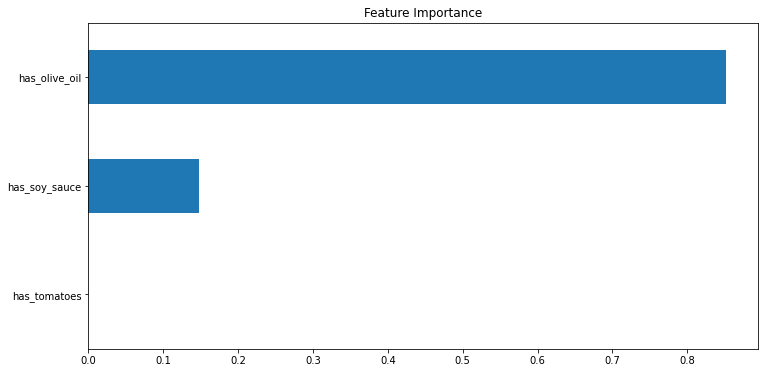

In [ ]:
import matplotlib.pyplot as plt

plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (12,6), legend = False, title = 'Feature Importance')
fig = plot.get_figure()

# Χαμηλό αρκετά

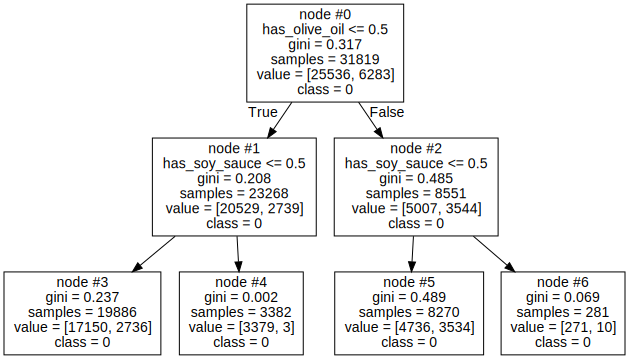

In [ ]:
# visualizing our decision tree 
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(estimator)
graphviz.Source(export_graphviz(estimator,
                                out_file=None,
                                feature_names=features_df.columns,
                                class_names=["0", "1"],
                                node_ids = True,
                                impurity=True))


# Να προσθέσουμε ένα υλικό ώστε να πάμε σε καλύτερη ακρίβεια πρόβλεψης

In [ ]:
features_df = pd.DataFrame({
    'has_tomatoes': df.ingredient_list.str.contains('tomato').astype(int),
    'has_olive_oil': df.ingredient_list.str.contains('olive oil').astype(int),
    'has_soy_sauce': df.ingredient_list.str.contains('soy sauce').astype(int),
    'has_basil': df.ingredient_list.str.contains('basil').astype(int)

})
features_df.head(3)

,has_tomatoes,has_olive_oil,has_soy_sauce,has_basil
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df.values, # αυτό είναι το αν έχει μέσα τομάτες, λάδι, σόγια και ΒΑΣΙΛΙΚΟ κ.λπ 
    df.is_italian, #αυτό είναι το LABEL που φτιάξαμε και είναι αριθμός! (δηλαδή 0/1, όχι Ναι/Όχι)
    test_size=0.2) 


In [ ]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
val_pred = estimator.predict(X_test)

In [ ]:
f1_score(y_test, val_pred, average='macro')

0.5795760604176461

Φαίνεται τα πάμε καλύτερα τώρα

In [ ]:
fi = pd.DataFrame(estimator.feature_importances_, features_df.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]



,Importance
has_olive_oil,0.616138
has_basil,0.383862
has_tomatoes,0.000000
has_soy_sauce,0.000000


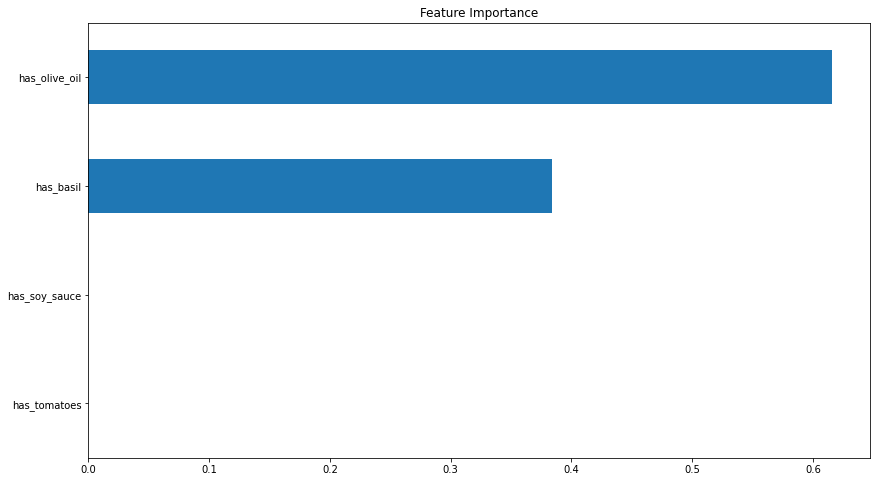

In [ ]:
plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (14,8), legend = False, title = 'Feature Importance')
fig = plot.get_figure()

# Πολύ καλύτερη η ακρίβεια!!! Πως θα βελτιωθεί όμως περισσότερο?

###(1) Μπορείτε να βρείτε άλλα υλικά που θα σας δώσουν καλύτερη προβλεψη στην ιταλική κουζίνα???

In [ ]:
df_ita = df[df.is_italian == 1]
df_ita

,cuisine,id,ingredient_list,is_italian
7,italian,3735,"sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries",1
9,italian,12734,"chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley",1
10,italian,5875,"pimentos, sweet pepper, dried oregano, olive oil, garlic, sharp cheddar cheese, pepper, swiss cheese, provolone cheese, canola oil, mushrooms, black olives, sausages",1
12,italian,2698,"Italian parsley leaves, walnuts, hot red pepper flakes, extra-virgin olive oil, fresh lemon juice, trout fillet, garlic cloves, chipotle chile, fine sea salt, flat leaf parsley",1
14,italian,31908,"fresh parmesan cheese, butter, all-purpose flour, fat free less sodium chicken broth, chopped fresh chives, gruyere cheese, ground black pepper, bacon slices, gnocchi, fat free milk, cooking spray, salt",1
...,...,...,...,...
39748,italian,9526,"sea salt, pizza doughs, all-purpose flour, cornmeal, extra-virgin olive oil, shredded mozzarella cheese, kosher salt, ricotta",1
39753,italian,33294,"rosemary sprigs, lemon zest, garlic cloves, ground black pepper, vegetable broth, fresh basil leaves, minced garlic, extra-virgin olive oil, thyme sprigs, red potato, parsley leaves, artichokes",1
39763,italian,44798,"fettuccine pasta, low-fat cream cheese, garlic, nonfat evaporated milk, grated parmesan cheese, corn starch, nonfat milk",1
39767,italian,24348,"low-fat sour cream, grated parmesan cheese, salt, dried oregano, low-fat cottage cheese, butter, onions, olive oil, artichok heart marin, ground cayenne pepper, ground black pepper, garlic, spaghetti",1


In [ ]:
pd.Series(df_ita.ingredient_list.str.cat(sep=', ').split(', ')).value_counts().head(30)

salt                      3454
olive oil                 3111
garlic cloves             1619
grated parmesan cheese    1580
garlic                    1471
ground black pepper       1444
extra-virgin olive oil    1362
onions                    1240
water                     1052
butter                    1030
pepper                     965
all-purpose flour          918
fresh basil                787
sugar                      760
dry white wine             658
kosher salt                656
black pepper               636
fresh parsley              631
eggs                       627
dried oregano              626
large eggs                 625
tomatoes                   601
flat leaf parsley          588
unsalted butter            564
cooking spray              491
parmesan cheese            474
fresh lemon juice          471
diced tomatoes             429
dried basil                425
crushed red pepper         418
dtype: int64

In [ ]:
features_df = pd.DataFrame({
    'has_grated_parmesan_cheese': df.ingredient_list.str.contains('grated parmesan cheese').astype(int),
    #'has_all-purpose_flour': df.ingredient_list.str.contains('all-purpose flour').astype(int),
    #'has_extra_virgin_olive_oil': df.ingredient_list.str.contains('extra-virgin olive oil').astype(int),
    'has_olive_oil': df.ingredient_list.str.contains('olive oil').astype(int),
    #'has_fresh_parsley': df.ingredient_list.str.contains('fresh parsley').astype(int),
    'has_basil': df.ingredient_list.str.contains('basil').astype(int),
    #'has_parsley': df.ingredient_list.str.contains('parsley').astype(int)
})
features_df.head(3)

,has_grated_parmesan_cheese,has_olive_oil,has_basil
0,0,0,0
1,0,0,0
2,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df.values, # αυτό είναι το αν έχει μέσα τομάτες, λάδι, σόγια και ΒΑΣΙΛΙΚΟ κ.λπ 
    df.is_italian, #αυτό είναι το LABEL που φτιάξαμε και είναι αριθμός! (δηλαδή 0/1, όχι Ναι/Όχι)
    test_size=0.2) 

In [ ]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
val_pred = estimator.predict(X_test)

In [ ]:
f1_score(y_test, val_pred, average='macro')

0.6850859967470876

In [ ]:
fi = pd.DataFrame(estimator.feature_importances_, features_df.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
has_grated_parmesan_cheese,0.514606
has_olive_oil,0.330369
has_basil,0.155025


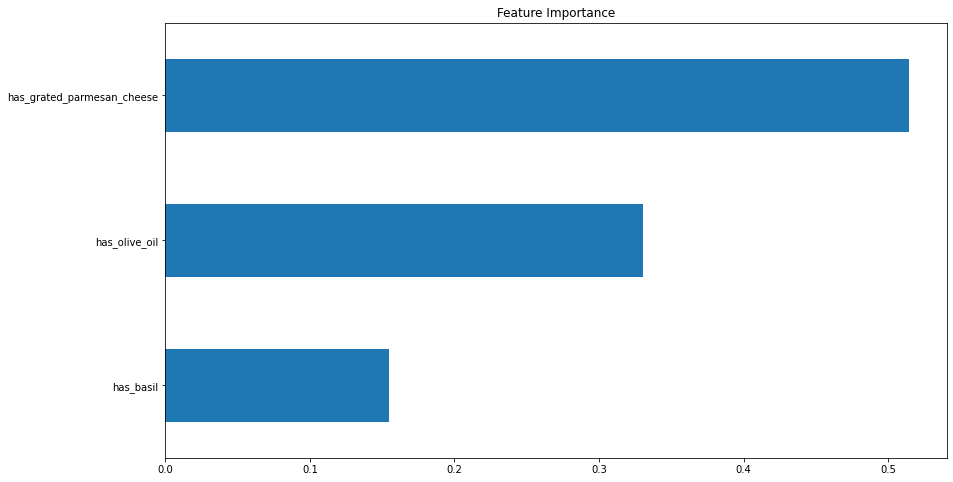

In [ ]:
plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (14,8), legend = False, title = 'Feature Importance')
fig = plot.get_figure()

###(2) Μπορείτε να βρείτε 3 υλικά ή παραπάνω που προβλέπουν με σχετικά μεγάλη ακρίβεια την ελληνική κουζίνα?

In [ ]:
df['is_greek'] = (df['cuisine'] == 'greek').astype(int)
df.head(20)
df_gr = df[df.is_greek == 1]
df_gr

,cuisine,id,ingredient_list,is_italian,is_greek
0,greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles",0,1
93,greek,34471,"ground pork, finely chopped fresh parsley, onions, salt, vinegar, caul fat",0,1
103,greek,4635,"minced garlic, dried oregano, red wine vinegar, olive oil, boneless chop pork, lemon juice",0,1
153,greek,5980,"orange, anise, cinnamon sticks, unflavored gelatin, zinfandel, orange blossom honey, sugar, lemon, calimyrna figs, clove, honey, whipping cream, plain whole-milk yogurt",0,1
186,greek,18031,"fresh dill, yoghurt, salt, myzithra, large eggs, cheese, feta cheese, phyllo, kefalotyri, ground black pepper, extra-virgin olive oil, onions",0,1
...,...,...,...,...,...
39709,greek,16201,"dried basil, zucchini, purple onion, ground coriander, fresh parsley, olive oil, extra-virgin olive oil, greek style plain yogurt, cucumber, dried thyme, red wine vinegar, salt, fresh lemon juice, dried oregano, fresh dill, ground black pepper, garlic, skinless chicken breasts, red bell pepper",0,1
39714,greek,22230,"rocket leaves, sun-dried tomatoes, yellow bell pepper, feta cheese crumbles, minced garlic, ground black pepper, salt, yellow squash, balsamic vinegar, bow-tie pasta, fresh basil, eggplant, extra-virgin olive oil, red bell pepper",0,1
39744,greek,5680,"extra-virgin olive oil, oregano, potatoes, garlic cloves, pepper, salt, yellow mustard, fresh lemon juice",0,1
39757,greek,34331,"red bell pepper, garlic cloves, extra-virgin olive oil, feta cheese crumbles",0,1


In [ ]:
#from nltk import ngrams
#from collections import Counter
#Counter(", ".join(df_gr["ingredient_list"]).split()).most_common(30)

In [ ]:
pd.Series(df_gr.ingredient_list.str.cat(sep=', ').split(', ')).value_counts().head(30)

salt                      572
olive oil                 504
dried oregano             267
garlic cloves             254
feta cheese crumbles      252
extra-virgin olive oil    229
fresh lemon juice         222
ground black pepper       221
garlic                    216
pepper                    203
feta cheese               191
cucumber                  187
purple onion              186
onions                    185
lemon juice               183
tomatoes                  156
water                     143
lemon                     129
fresh parsley             113
fresh dill                108
all-purpose flour         100
red wine vinegar           99
butter                     90
black pepper               89
kosher salt                85
greek yogurt               84
fresh oregano              83
eggs                       80
kalamata                   78
sugar                      77
dtype: int64

In [ ]:
features_gr_df = pd.DataFrame({
    #'has_olive_oil': df.ingredient_list.str.contains('olive oil').astype(int),
    #'has_dried_oregano': df.ingredient_list.str.contains('dried oregano').astype(int),
    'has_feta_cheese_crumbles': df.ingredient_list.str.contains('feta').astype(int),
    #'has_oregano': df.ingredient_list.str.contains('oregano').astype(int),
    'has_lemon_juice': df.ingredient_list.str.contains('lemon juice').astype(int),
    #'has_tomato': df.ingredient_list.str.contains('tomato').astype(int),
    #'has_parsley': df.ingredient_list.str.contains('parsley').astype(int),
    'has_kalamata': df.ingredient_list.str.contains('cucumber').astype(int)
})
features_gr_df.head(3)

,has_feta_cheese_crumbles,has_lemon_juice,has_kalamata
0,1,0,0
1,0,0,0
2,0,0,0


In [ ]:
#estimator = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_gr_df.values, # αυτό είναι το αν έχει μέσα τομάτες, λάδι, σόγια και ΒΑΣΙΛΙΚΟ κ.λπ 
    df.is_greek, #αυτό είναι το LABEL που φτιάξαμε και είναι αριθμός! (δηλαδή 0/1, όχι Ναι/Όχι)
    test_size=0.2) 

In [ ]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
val_pred = estimator.predict(X_test)

In [ ]:
f1_score(y_test, val_pred, average='macro')

0.748345760590718

In [ ]:
fi = pd.DataFrame(estimator.feature_importances_, features_gr_df.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
has_feta_cheese_crumbles,0.879593
has_kalamata,0.072146
has_lemon_juice,0.048261


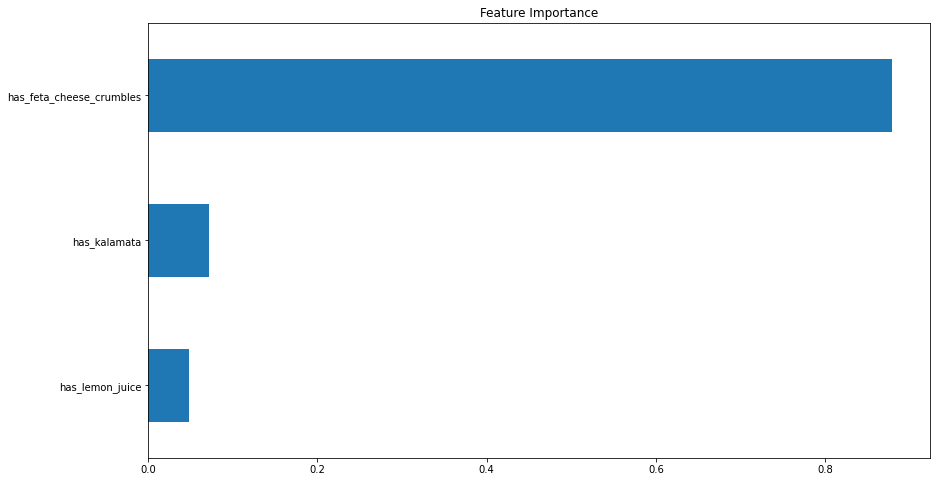

In [ ]:
plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (14,8), legend = False, title = 'Feature Importance')
fig = plot.get_figure()